In [124]:
''' 
Result Visualization
Author: Yitian Shao
Created on 2022.01.28
'''
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', size=18, family='Verdana') # 'Tahoma', 'DejaVu Sans', 'Verdana'
plt.rc('axes', edgecolor='0.5', linewidth=0.75)
plt.rc('axes.spines', **{'bottom':True, 'left':True, 'right':False, 'top':False})

In [51]:
''' General functions '''
def selectConditions(dFrame, condiList):
    #ind = np.zeros(dFrame['CondiName'].shape, dtype=bool)
    indList = []
    for aCondi in condiList:
        #ind = ind | (dFrame['CondiName'] == aCondi)
        indList.extend(dFrame[dFrame['CondiName'] == aCondi].index)
        
    return indList


In [7]:
''' Load data '''
condiTable = pd.read_csv("./data./ConditionTable.csv") # Table of measurement conditions

measureData = pd.read_csv("./data./Measurements.csv") # Data from physical measurements

measureData.tail()

,Unnamed: 0,CondiName,AvgPressure_kPa,RiseTime_sec,MaxPressure_kPa
110,97,FR3MedTube,6.089633,0.385,9.632123
111,98,FR3MedTube,5.744973,0.639,10.010366
112,99,FR3MedTube,6.232964,0.821,8.363430
113,100,FR3MedTube,9.490346,0.860,14.730733
114,101,FR3MedTube,6.901397,0.756,10.782966


In [8]:
simData = pd.read_csv("./data./temp_result.csv") # Data from model simulation

''' Average and median rising time of each condition '''

simData['deltaT'] = np.nan
simData['deltaTm'] = np.nan

# trialsData = []
# trialMax = []

for aCondi in condiTable['CondiName']:
    allTrials = measureData[measureData['CondiName'] == aCondi]
    avgDeltaT = np.mean(allTrials['RiseTime_sec'])
    medDeltaT = np.median(allTrials['RiseTime_sec'])
    print("%s - average deltaT = %.3f sec, median deltaT = %.3f sec" % (aCondi, avgDeltaT, medDeltaT))
    
    simData.loc[simData['CondiName'] == aCondi,'deltaT'] = avgDeltaT
#     simData.loc[simData['CondiName'] == aCondi,'deltaTm'] = medDeltaT

#     trialsData.append(allTrials['AvgPressure_kPa'])
#     trialMax.append(allTrials['AvgPressure_kPa'].max())
    
simData['pLossFull'] = simData['lossFactor']*simData['dVFull_m3']/simData['deltaT']
simData['pLoss1Expan'] = simData['lossFactor']*simData['dV1Expan_m3']/simData['deltaT']

# simData['pLoss1ExpanM'] = simData['lossFactor']*simData['dV1Expan_m3']/simData['deltaTm']



6mLBOPP12 - average deltaT = 0.722 sec, median deltaT = 0.796 sec
6mLBOPP16 - average deltaT = 2.308 sec, median deltaT = 1.876 sec
6mLL0Ws12SoftTube - average deltaT = 1.948 sec, median deltaT = 1.309 sec
BOPP16ShiftedU7kV - average deltaT = 1.470 sec, median deltaT = 0.819 sec
L0Ws16ShiftedU9kV - average deltaT = 1.651 sec, median deltaT = 1.754 sec
L0Ws16NoShift - average deltaT = 2.000 sec, median deltaT = 1.698 sec
Mylar16 - average deltaT = 0.962 sec, median deltaT = 0.960 sec
Mylar16NoShift - average deltaT = 1.363 sec, median deltaT = 0.948 sec
BOPP16 - average deltaT = 1.607 sec, median deltaT = 1.157 sec
BOPP20 - average deltaT = 1.339 sec, median deltaT = 0.957 sec
BOPP16U9kV - average deltaT = 0.850 sec, median deltaT = 0.649 sec
MLSi16SB7kV - average deltaT = 0.115 sec, median deltaT = 0.115 sec
MLSi16CB7kV - average deltaT = 0.124 sec, median deltaT = 0.124 sec
MLSi20SB7kV - average deltaT = 0.130 sec, median deltaT = 0.114 sec
MLSi20B7kV - average deltaT = 0.117 sec, med

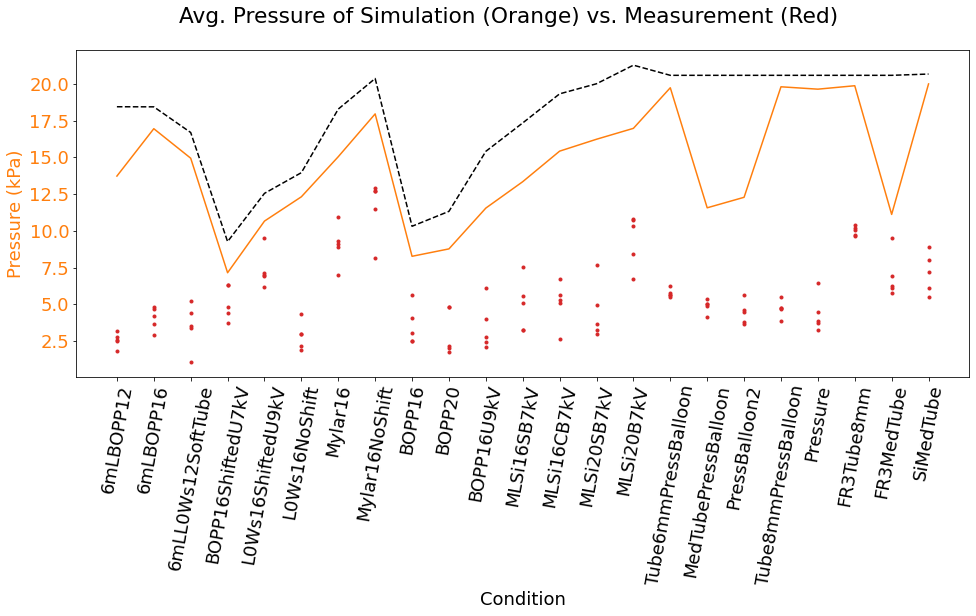

In [5]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], simData['P1Expan_Pa']*1e-3, '--', color='k')
ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
# ax1.plot(simData['CondiName'], (simData['PFull_Pa'] - simData['pLossFull'])*1e-3, '--', color='b')
#ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1ExpanM'])*1e-3, color='b')
ax1.plot(measureData['CondiName'], measureData['AvgPressure_kPa'], '.',color='tab:red')
# ax1.plot(measureData['CondiName'], measureData['MaxPressure_kPa'], '.',color='tab:blue')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

# ax1.set_ylim([0, 22.5]);

3    BOPP16ShiftedU7kV
4    L0Ws16ShiftedU9kV
6              Mylar16
Name: CondiName, dtype: object
8            BOPP16
5     L0Ws16NoShift
7    Mylar16NoShift
Name: CondiName, dtype: object


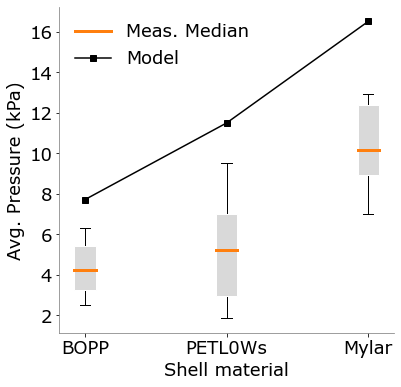

In [134]:
''' Compare material '''
compList = ['BOPP16ShiftedU7kV','L0Ws16ShiftedU9kV','Mylar16'] # List of conditions to be compared
compList2 = ['BOPP16','L0Ws16NoShift','Mylar16NoShift'] # List of conditions (Dash No shift) to be compared

indList = selectConditions(simData, compList)
indList2 = selectConditions(simData, compList2)
print(simData.loc[indList,'CondiName']); print(simData.loc[indList2,'CondiName'])

sim1 = np.array(simData.loc[indList,'P1Expan_Pa'] - simData.loc[indList,'pLoss1Expan'])*1e-3
sim2 = np.array(simData.loc[indList2,'P1Expan_Pa'] - simData.loc[indList2,'pLoss1Expan'])*1e-3
simAvg = 0.5 * (sim1 + sim2)

trialsData = []
for aPair in zip(compList, compList2): # Ordered based on the list
    mergedCondi = measureData.loc[measureData['CondiName'] == aPair[0], 'AvgPressure_kPa'].tolist()
    mergedCondi.extend(measureData.loc[measureData['CondiName'] == aPair[1], 'AvgPressure_kPa'].tolist())
    trialsData.append(mergedCondi)    

''' Generate plot '''    
boxprops = dict(linestyle='-', linewidth=1, color='w', facecolor='0.85')
medianprops = dict(linestyle='-', linewidth=3, color='tab:orange')
    
fig1, ax1 = plt.subplots()
fig1.set_size_inches(6,6)
#fig1.suptitle("Avg. Pressure provide by different shell materials")
ax1.set_xlabel('Shell material')
ax1.set_xticklabels(compList, rotation=0)

x = range(len(compList))

pH = ax1.plot(x, simAvg, 's-', color='k')

pH2 = ax1.boxplot(trialsData, positions=x, widths = 0.15, manage_ticks = False, medianprops=medianprops, 
                 patch_artist=True, boxprops=boxprops, notch = False, showfliers = True)

ax1.set_ylabel('Avg. Pressure (kPa)', color='k')
ax1.tick_params(axis='y', labelcolor='k')

plt.xticks(x, condiTable.loc[indList, 'Shell']);

ax1.legend(handles=[pH2['medians'][0],pH[0]],labels=['Meas. Median','Model'], frameon=False);

plt.savefig("comp_shell_material.pdf", bbox_inches='tight')

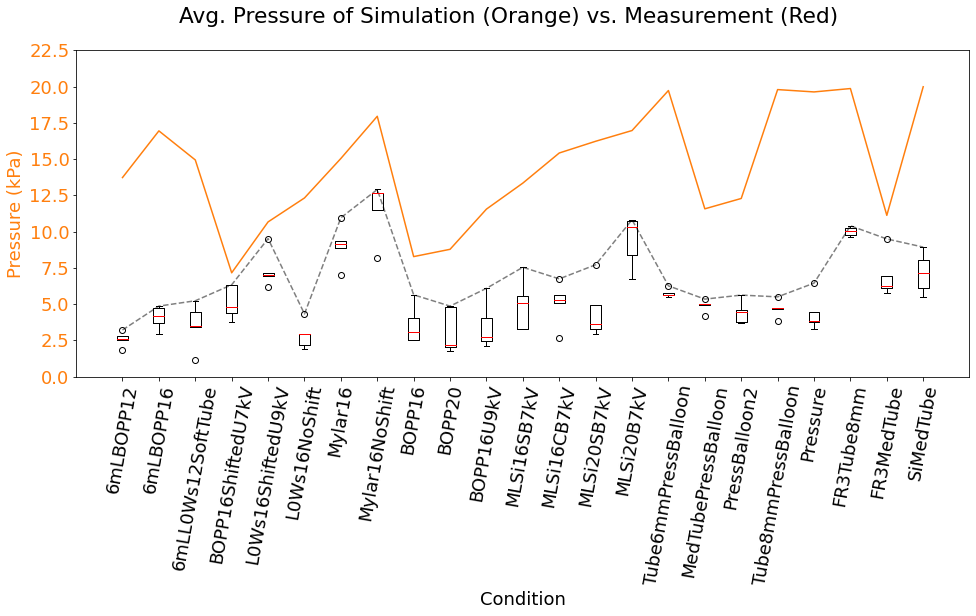

In [6]:
''' Boxplot of trials '''
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Measurement (Red)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

x = range(len(simData))

ax1.plot(x, trialMax, '--', color='tab:grey')

ax1.plot(x, (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
box1 = ax1.boxplot(trialsData, positions=x, widths = 0.3, manage_ticks = False, medianprops=dict(color='red'))

ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

plt.xticks(x, simData['CondiName'])

ax1.set_ylim([0, 22.5]);

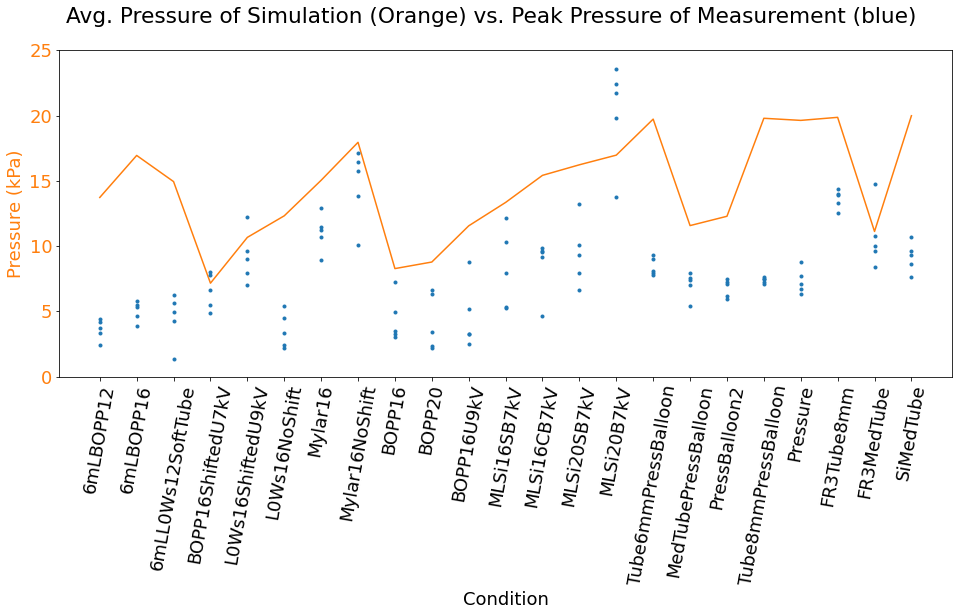

In [7]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(16,6)
fig1.suptitle("Avg. Pressure of Simulation (Orange) vs. Peak Pressure of Measurement (blue)")
ax1.set_xlabel('Condition')
ax1.set_xticklabels(simData['CondiName'], rotation=80)

ax1.plot(simData['CondiName'], (simData['P1Expan_Pa'] - simData['pLoss1Expan'])*1e-3, '-', color='tab:orange')
ax1.plot(measureData['CondiName'], measureData['MaxPressure_kPa'], '.',color='tab:blue')
ax1.set_ylabel('Pressure (kPa)', color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')

ax1.set_ylim([0, 25]);